<a href="https://colab.research.google.com/github/taskswithcode/probability_for_ml_notebooks/blob/main/MLToyModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Toy Model**

### Synthetic dataset creation


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# generate synthetic data
np.random.seed(0)
rooms = 2 + np.random.normal(0, 1, 100)
prices = 100 + 50 * rooms + np.random.normal(0, 20, 100)

### 1. Computing average the well known way

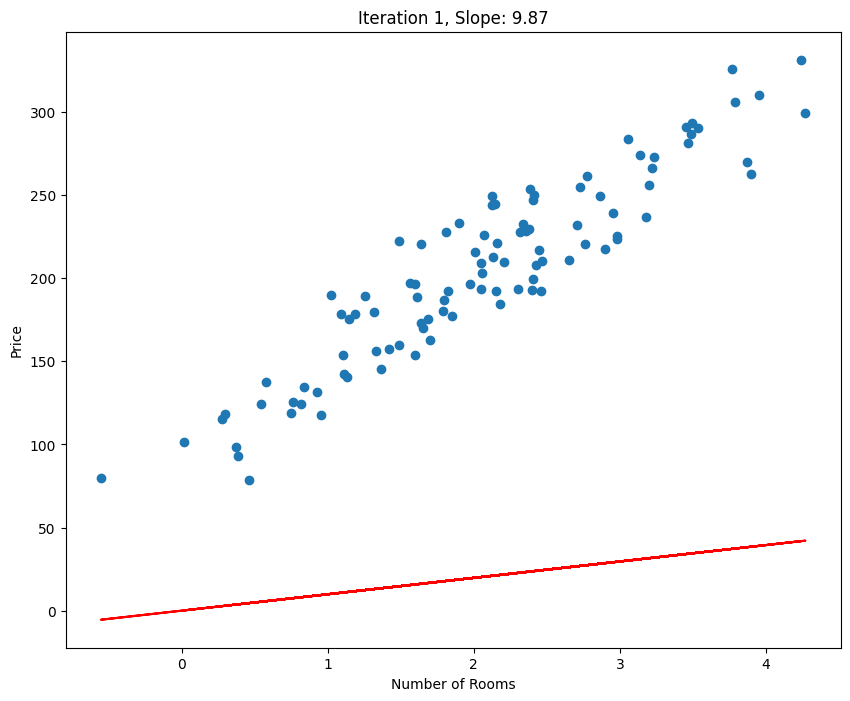

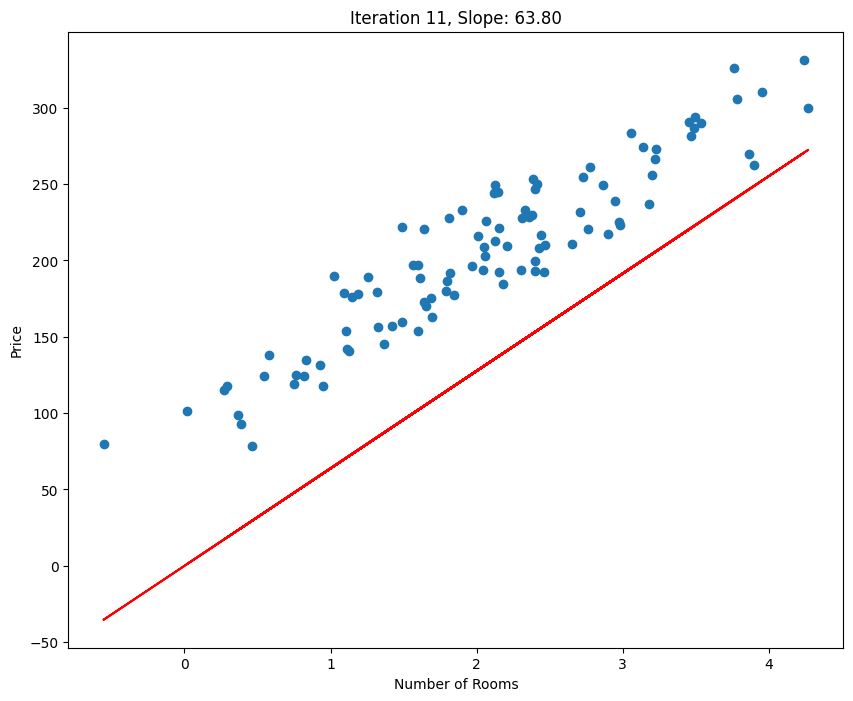

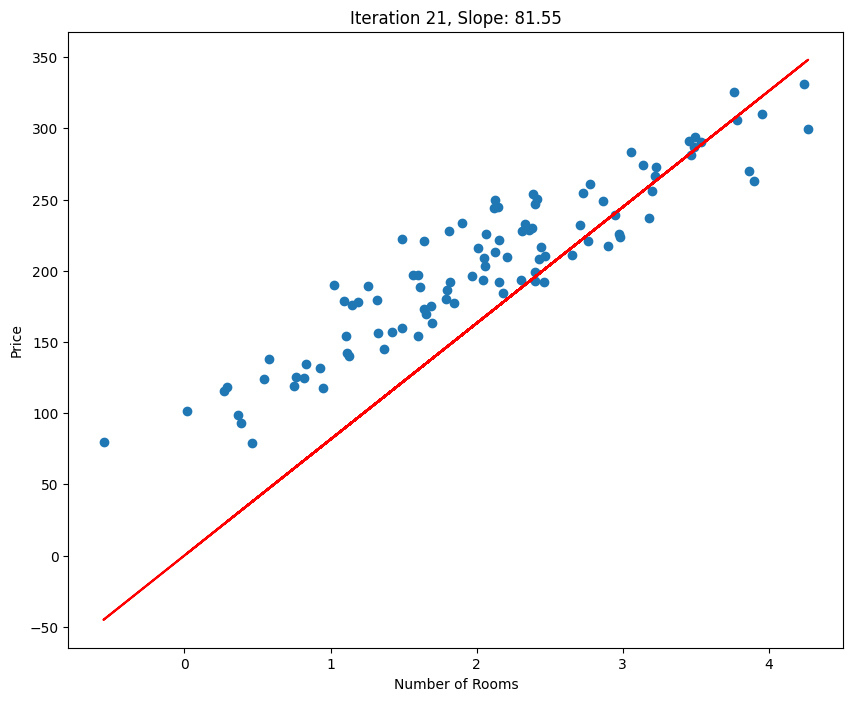

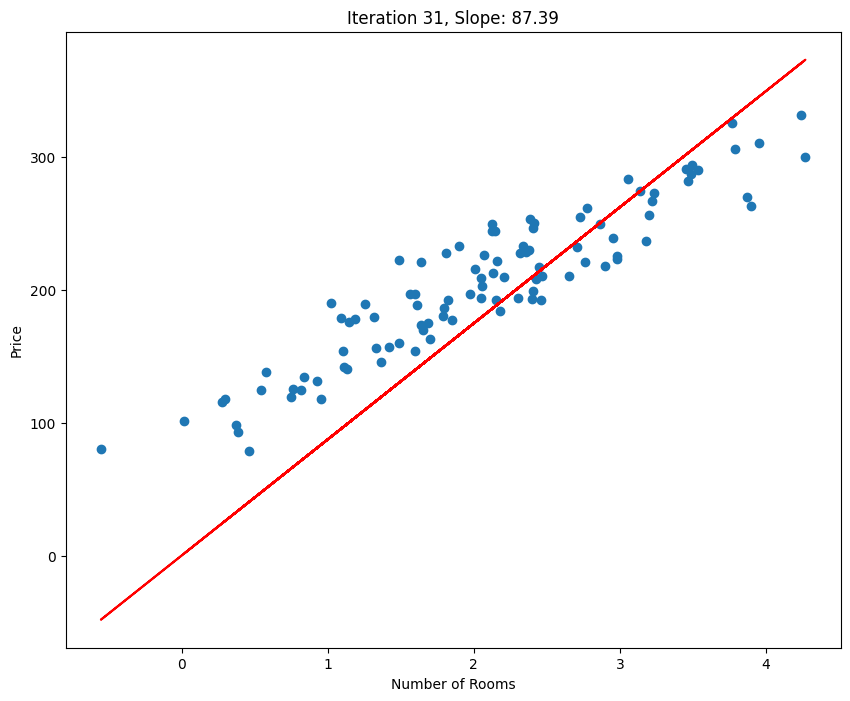

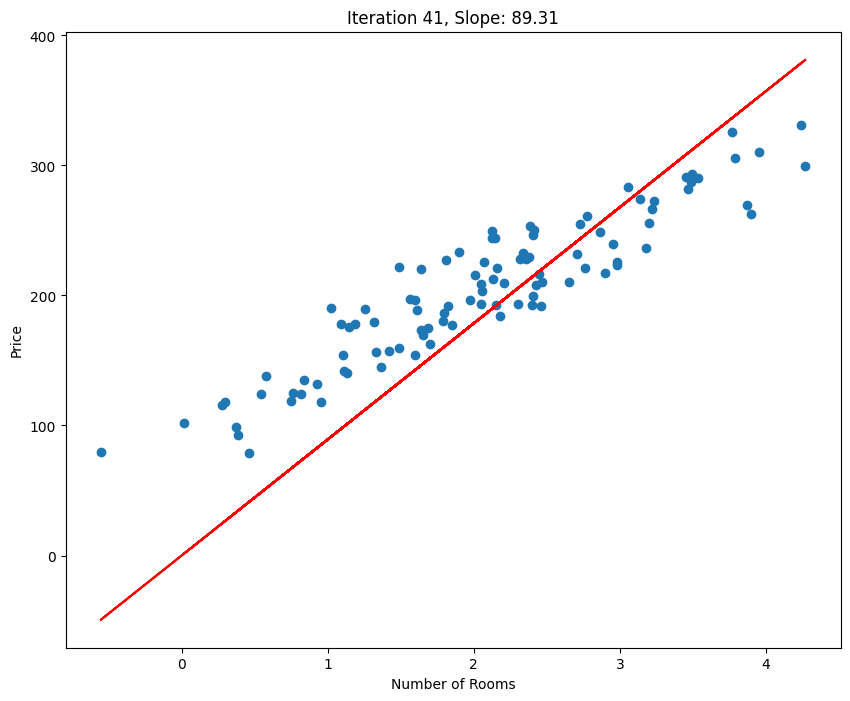

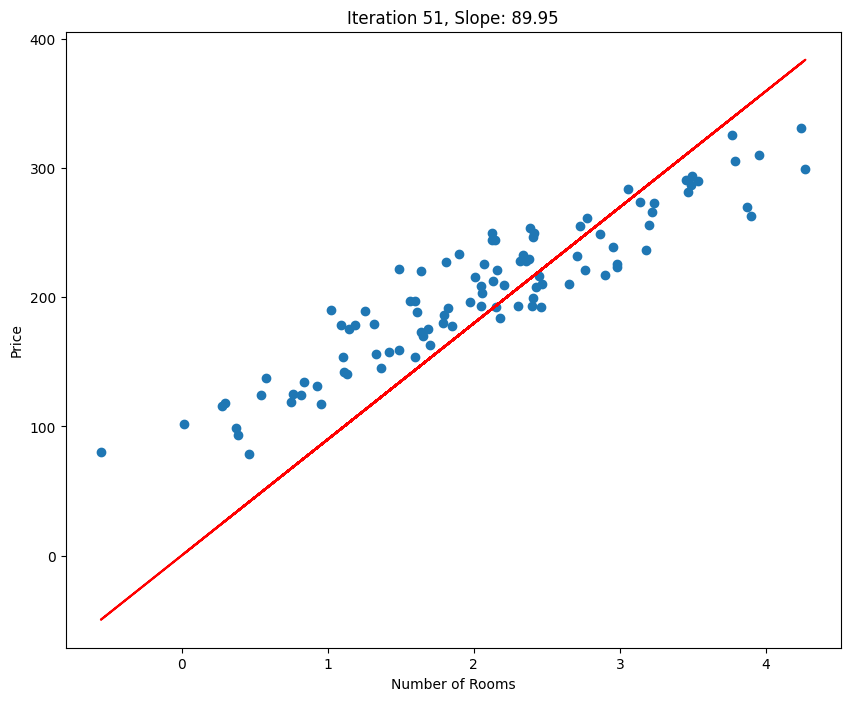

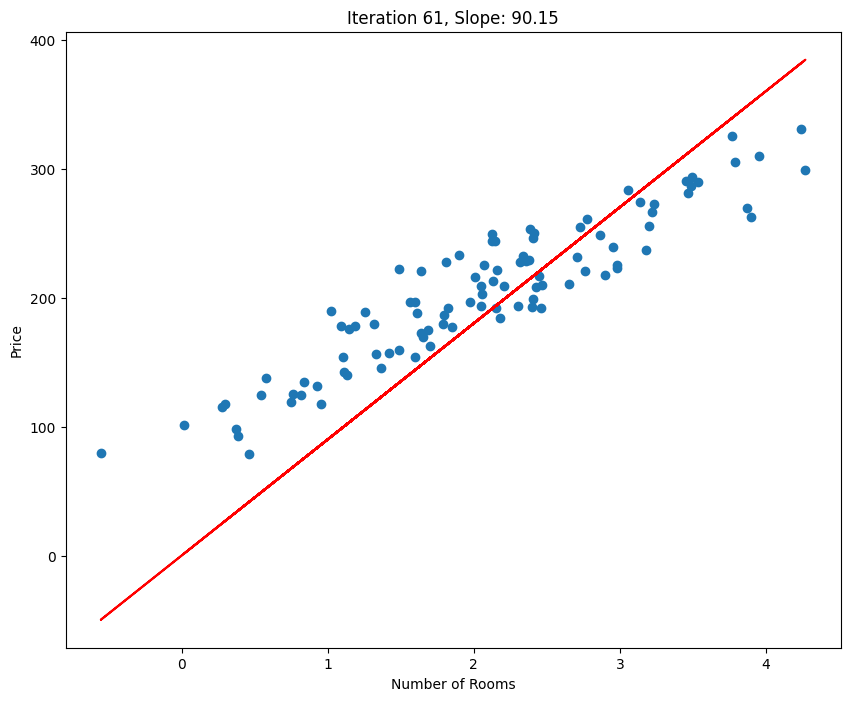

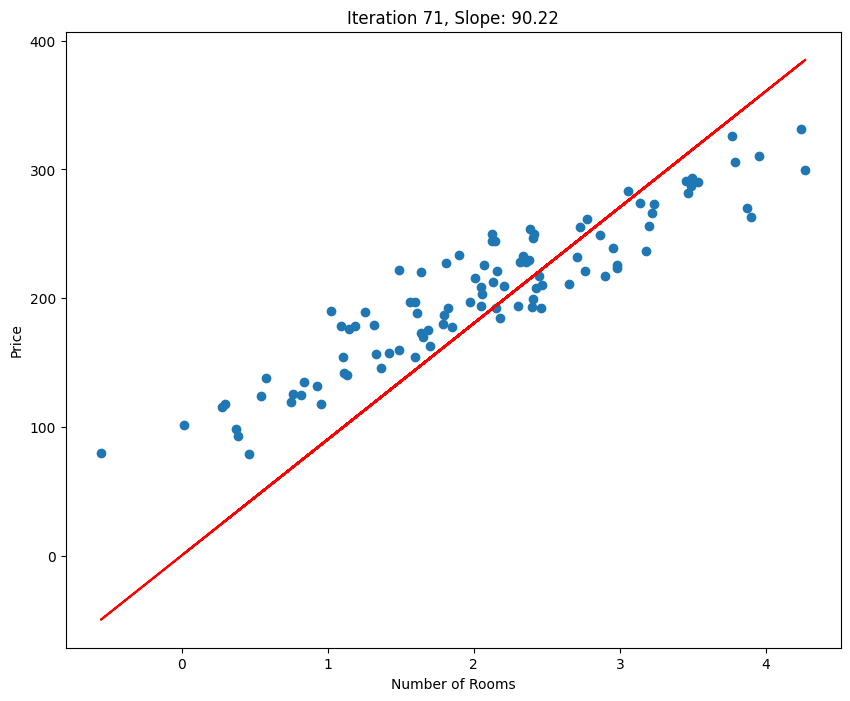

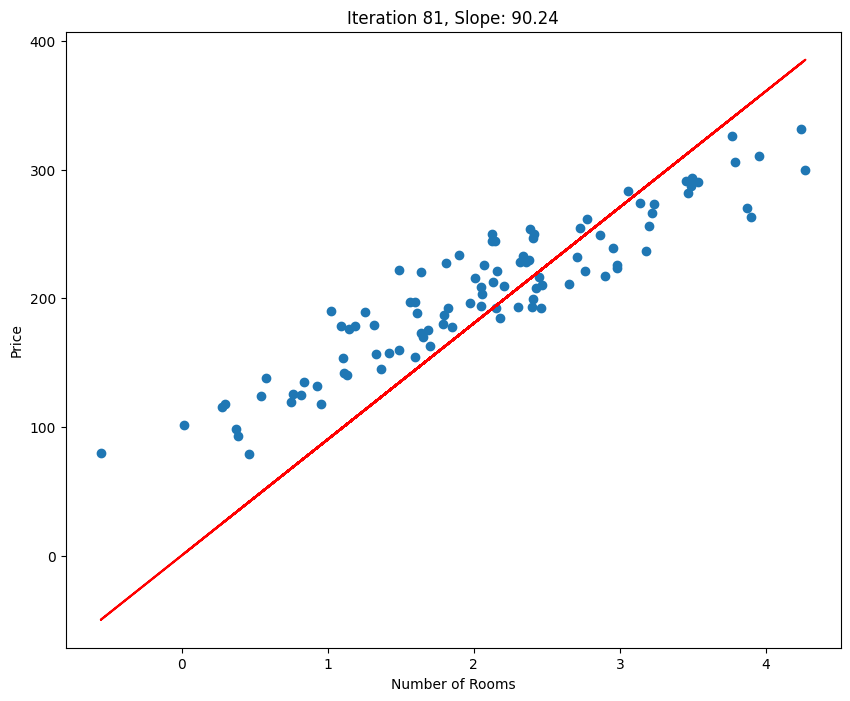

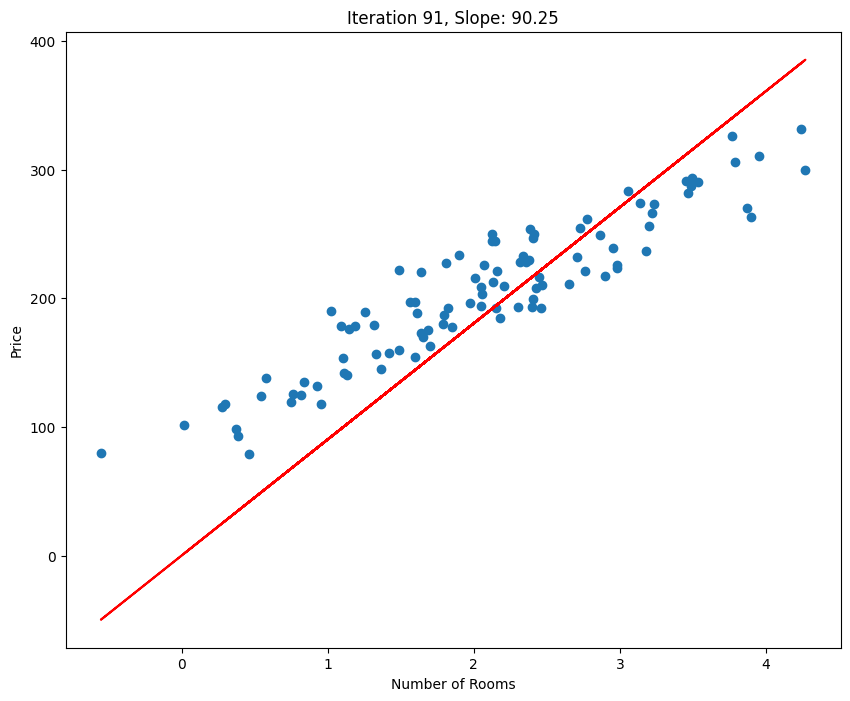

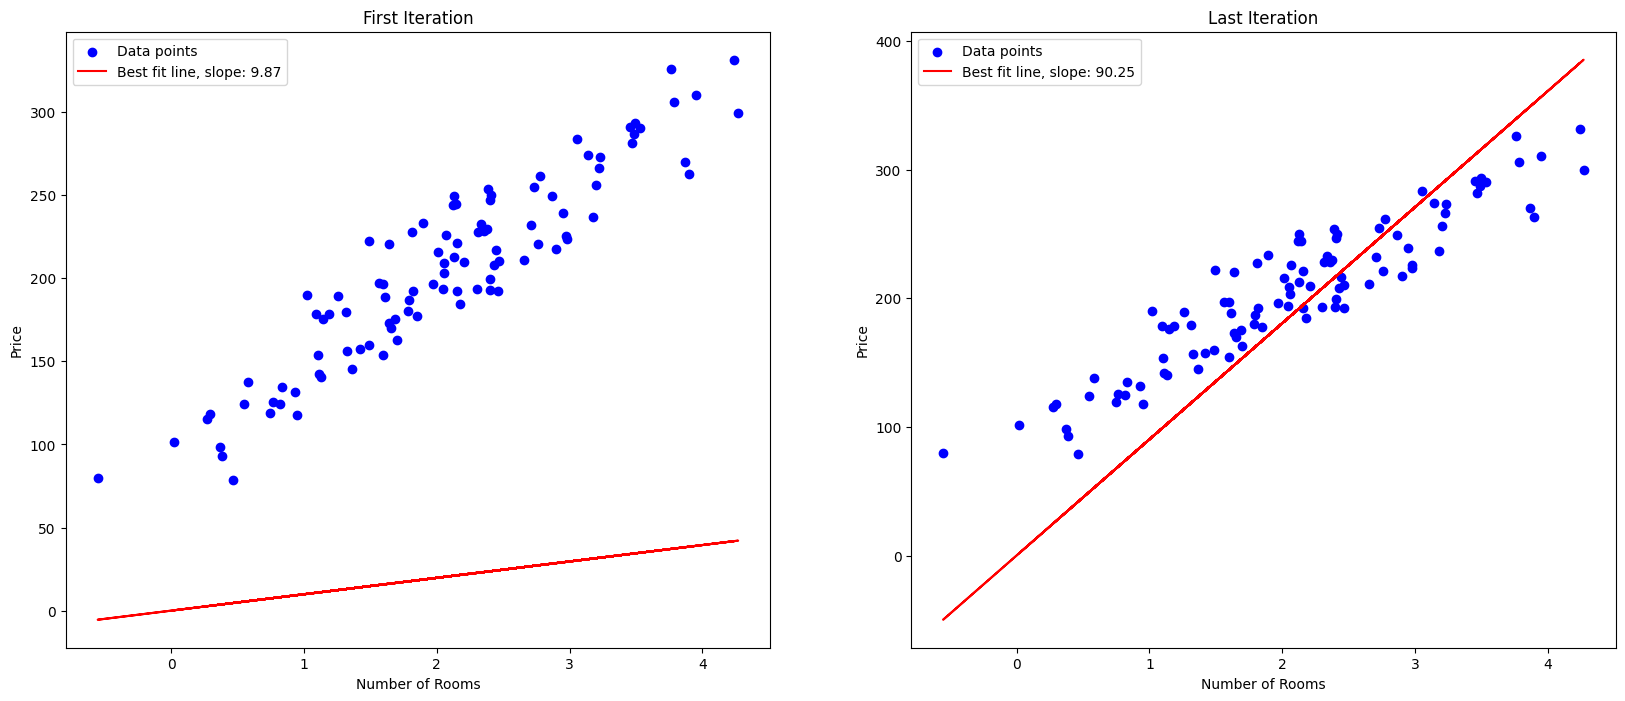

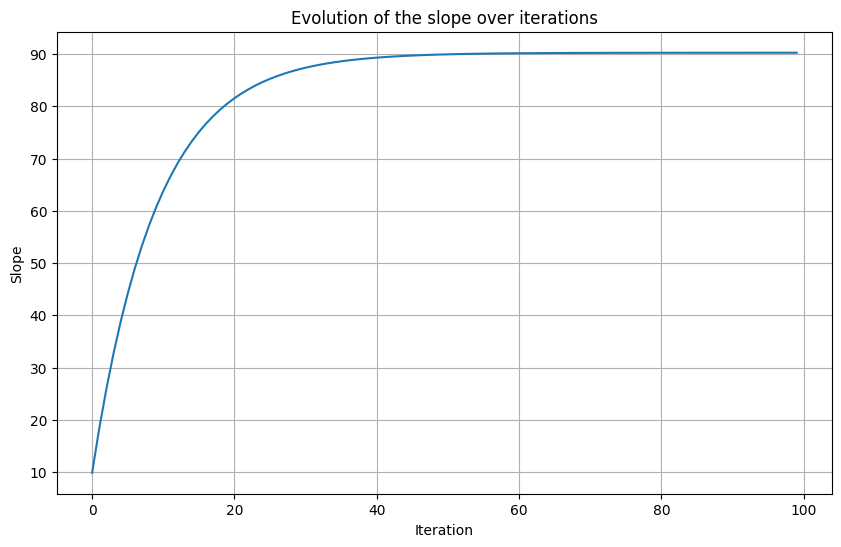

In [13]:
# Define function to predict prices
def predict_price(slope, rooms):
    return slope * rooms


# learning rate and number of iterations
lr = 0.01 #Tweak this to see how the model learning converges
iterations = 100

# initialize slope with a different random seed
np.random.seed(1)
slope = np.random.rand()

# training process
history_slope = []
for i in range(iterations):
    # predict prices
    pred_prices = slope * rooms

    # calculate error
    error = pred_prices - prices

    # calculate gradient
    gradient = np.mean(2 * rooms * error)

    # update slope
    slope -= lr * gradient

    # save history
    history_slope.append(slope)

    # visualization
    if (i % 10 == 0):
      plt.figure(figsize=(10, 8))
      plt.scatter(rooms, prices)
      pred_prices_vals = predict_price(slope, rooms)
      plt.plot(rooms, pred_prices_vals, color='red')
      plt.title(f'Iteration {i+1}, Slope: {slope:.2f}')
      plt.xlabel('Number of Rooms')
      plt.ylabel('Price')
      plt.show()

# Predict prices for the first and last iterations
first_slope = history_slope[0]
last_slope = history_slope[-1]

pred_prices_first_iter = predict_price(first_slope, rooms)
pred_prices_last_iter = predict_price(last_slope, rooms)

# Plot the data points and the lines of best fit
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# First iteration
ax[0].scatter(rooms, prices, color='blue', label='Data points')
ax[0].plot(rooms, pred_prices_first_iter, color='red', label=f'Best fit line, slope: {first_slope:.2f}')
ax[0].set_title('First Iteration')
ax[0].set_xlabel('Number of Rooms')
ax[0].set_ylabel('Price')
ax[0].legend()

# Last iteration
ax[1].scatter(rooms, prices, color='blue', label='Data points')
ax[1].plot(rooms, pred_prices_last_iter, color='red', label=f'Best fit line, slope: {last_slope:.2f}')
ax[1].set_title('Last Iteration')
ax[1].set_xlabel('Number of Rooms')
ax[1].set_ylabel('Price')
ax[1].legend()


plt.show()


# Plot the evolution of the slope
plt.figure(figsize=(10, 6))
plt.plot(history_slope)
plt.title('Evolution of the slope over iterations')
plt.xlabel('Iteration')
plt.ylabel('Slope')
plt.grid(True)
plt.show()